# Module 2: Regression

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [15]:
df = pd.read_csv("data.csv")

In [17]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


### Normalize the dataset

In [22]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [23]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [24]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [25]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [26]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [27]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Distribution of prices

<Axes: xlabel='msrp', ylabel='Count'>

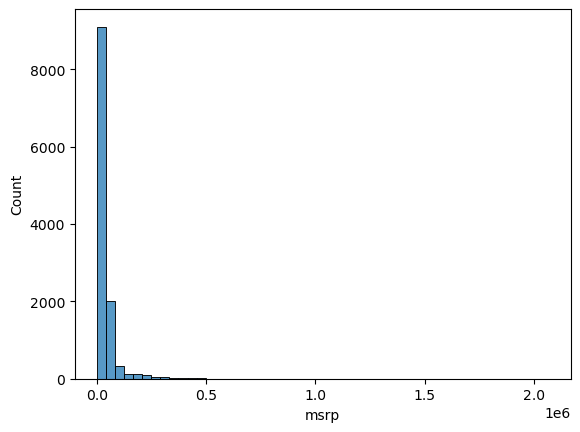

In [36]:
sns.histplot(df.msrp, bins=50)

long-tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

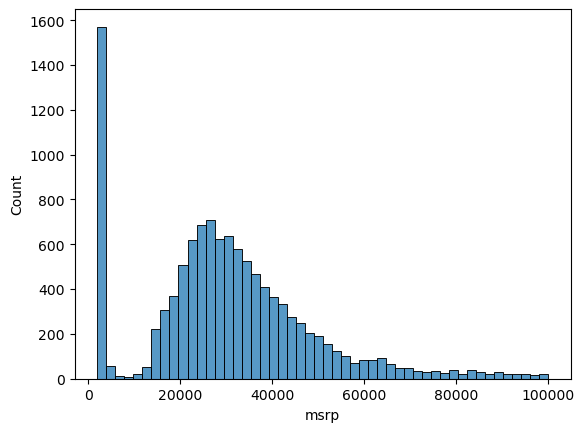

In [32]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Apply log to get rid of the long tail.

In [33]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

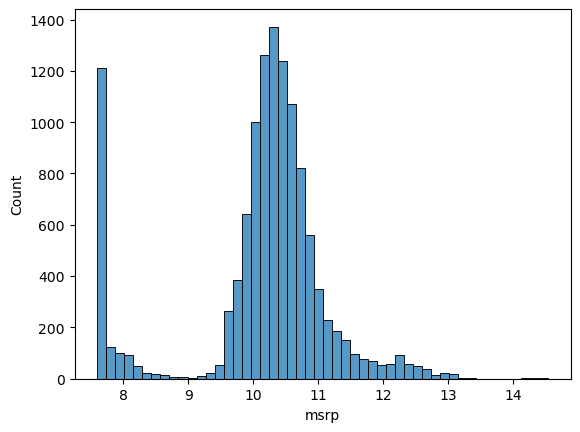

In [35]:
sns.histplot(price_logs, bins=50)

### Missing values

In [38]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up validation framework

In [42]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test # remaining 60%

In [41]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [51]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [52]:
idx = np.arange(n)

In [53]:
np.random.seed(2)
np.random.shuffle(idx)

In [54]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [56]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [57]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [59]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [60]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear regression

In [61]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [69]:
xi =  [453, 11, 86]

function
$$g(x) \approx y$$

- $g$ = model
- $x$ = features matrix
- $y$ = target

$$g(x_i) \approx y_i$$

In [63]:
## example
def g(xi):
    #do something
    return 10000

linear function

$$g(x_i) = w_0 + w_{i1} x_{i1} + w_{i2} x_{i2} + ... + w_{in} x_{in}$$


- $w_0$= bias (intercept term)
- $w_i$ = weights
- $x_i$ = input features

which also can be written as

$$g(x_i) = w_0 + \sum_{j=1}^n w_j x_{ij}$$

In [97]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [74]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pre

In [75]:
linear_regression(xi)

12.312

In [78]:
np.expm1(12.312)

222347.2221101062

## Linear regression vector form

In [79]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [80]:
def linear_regression(xi):
    return w0 * dot(xi, w)

In [81]:
w_new = [w0] + w

In [82]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [88]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [89]:
linear_regression(xi)

12.312

In [92]:
xi =  [453, 11, 86]
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [91]:
x1 = [1,148,24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [94]:
def linear_regression(X):
    return X.dot(w_new)

In [95]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a linear regression model

$$ Xw \approx y $$

find a way to get $w$

In [98]:
def train_linear_regression(X, y):
    pass

In [121]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [105]:
y = [100, 200, 150, 250, 100, 200, 150 , 250, 120]

In [108]:
ones = np.ones(X.shape[0])

In [111]:
X = np.column_stack([ones, X])

In [112]:
XTX = X.T.dot(X)

In [113]:
XTX_inv = np.linalg.inv(XTX)

In [114]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -3.46944695e-18,  0.00000000e+00,
         0.00000000e+00],
       [ 1.81898940e-12,  1.00000000e+00,  0.00000000e+00,
        -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.38777878e-17],
       [ 0.00000000e+00, -5.32907052e-15,  1.42108547e-14,
         1.00000000e+00]])

In [116]:
w_full = XTX_inv.dot(X.T).dot(y)

In [117]:
w0 = w_full[0]
w = w_full[1:]

In [118]:
w0, w

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [120]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [122]:
train_linear_regression(X, y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

## Car price baseline model

In [127]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [128]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [129]:
X_train = df_train[base].values

In [134]:
X_train = df_train[base].fillna(0).values

In [135]:
w0, w = train_linear_regression(X_train, y_train)

In [138]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

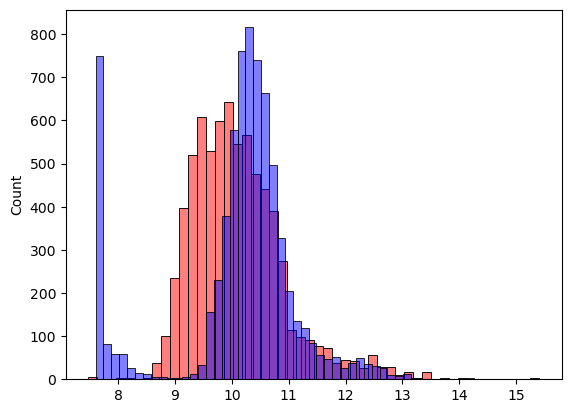

In [139]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color = 'blue', alpha=0.5, bins=50)

The figure shows that price prediction is far off from the actual price. Now, we need a way to quantify how bad the model is. 

## RMSE

In [145]:
def rmse(y, y_pred):
    se =( y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [146]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating the model

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [144]:
def prepare_X(df):
    df_num = df[base]

    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [147]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

## Simple feature engineering

In [148]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [160]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [161]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

Lower RMSE means better model performance. The model's predictions are closer to the true values.

<Axes: ylabel='Count'>

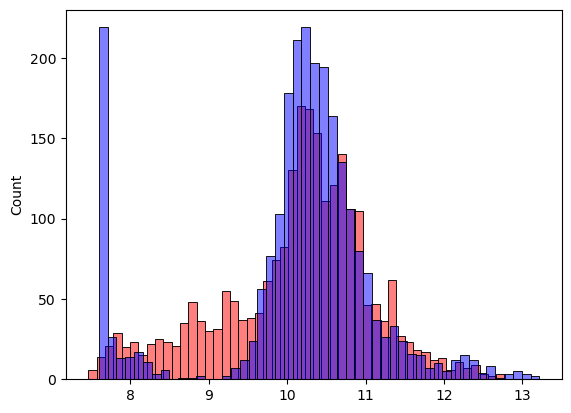

In [163]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color = 'blue', alpha=0.5, bins=50)

## Categorical variables

In [167]:
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int32

In [182]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [184]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502352

In [189]:
makes = list(df.make.value_counts().head().index)

In [190]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [191]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557034

In [192]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int32
num_doors_3            int32
num_doors_4            int32
dtype: object

In [194]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [195]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [196]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [200]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for name, values in categories.items():
        for value in values:
            df['%s_%s' % (name,value)] = (df[name] == value).astype('int')
            features.append('%s_%s' % (name,value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [201]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

29.712942828139816

In [199]:
w0

1.0988239383087292e+16

## Regularization

In [217]:
X = [
    [4, 4, 4],
    [3, 5, 5], 
    [5, 1, 1], 
    [5, 4, 4], 
    [7, 5, 5], 
    [4, 5, 5.0000001],
]
X = np.array(X)

y = [1,2,3,1,2,3]

In [218]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [219]:
XTX_inv = np.linalg.inv(XTX)

In [220]:
XTX_inv

array([[ 4.07252125e-02, -4.86981331e+05,  4.86981308e+05],
       [-4.86981357e+05,  1.10817945e+14, -1.10817944e+14],
       [ 4.86981313e+05, -1.10817944e+14,  1.10817943e+14]])

In [215]:
XTX_inv.dot(X.T).dot(y)

array([ 1.40505451e+00, -1.38928259e+07,  1.38928251e+07])

In [227]:
XTX = [
    [1,2,2],
    [2,1,1.00000001], 
    [2,1.0000001,1],
]

XTX = np.array(XTX)

In [226]:
np.linalg.inv(XTX)

array([[ -0.33668907,   0.33501248,   0.3350155 ],
       [  0.3350155 ,  49.91568397, -50.0848668 ],
       [  0.33501248, -50.08486527,  49.91568397]])

In [230]:
XTX = XTX + 0.01 * np.eye(3)

In [231]:
np.linalg.inv(XTX)

array([[ -0.33668907,   0.33501248,   0.3350155 ],
       [  0.3350155 ,  49.91568397, -50.0848668 ],
       [  0.33501248, -50.08486527,  49.91568397]])

In [233]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [234]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45652199012671885

## Tuning the model

In [237]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 1.0988239383087292e+16 29.712942828139816
1e-05 9.26383336455551 0.45651701511530657
0.0001 6.3309463738171665 0.45651706293909966
0.001 6.28552228338358 0.45651750869782065
0.1 6.191208657249507 0.4565692763042894
1 5.634896667949306 0.45722043179967
10 4.283980108969971 0.4701456932099154


In [239]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

0.45651750869782065

## Using the model

In [242]:
df_full_train = pd.concat([df_train, df_val])

In [248]:
df_full_train = df_full_train.reset_index(drop=True)

In [249]:
X_full_train = prepare_X(df_full_train)

In [250]:
y_full_train = np.concatenate([y_train, y_val])

In [252]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [254]:
w

array([ 1.52506334e-03,  1.18188694e-01, -6.66105724e-03, -5.33414117e-03,
       -4.87603196e-05, -9.69091849e-02, -7.92623108e-01, -8.90864322e-01,
       -6.35103033e-01, -4.14339218e-02,  1.75560737e-01, -5.78067084e-04,
       -1.00563873e-01, -9.27549683e-02, -4.66859089e-01,  7.98659955e-02,
       -3.16047638e-01, -5.51981604e-01, -7.89525255e-02,  1.09536726e+00,
        9.20059720e-01,  1.14963711e+00,  2.65277321e+00,  5.09996290e-01,
        1.62933899e+00,  1.53004304e+00,  1.61722175e+00,  1.54522114e+00,
       -9.70559788e-02,  3.73062078e-02, -5.81767461e-02, -2.35940808e-02,
       -1.19357029e-02,  2.18895262e+00,  2.07458271e+00,  2.05916687e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [255]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.4517749304358022

In [256]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [257]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [258]:
X_small = prepare_X(df_small)

In [260]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.462651725397457

In [261]:
np.expm1(y_pred)

34983.19704110253

In [262]:
y_test[20]

10.463131911491967

In [263]:
np.expm1(y_test[20])

35000.00000000001